In [1]:
# 데이터 분석 관련 라이브러리
import pandas as pd  # 데이터 프레임 처리
import numpy as np  # 배열, 행렬 연산

# 시각화 관련 라이브러리
import matplotlib.pyplot as plt  # 기본적인 시각화
import seaborn as sns  # 고급 시각화
import matplotlib.font_manager as fm  # 폰트 설정
from matplotlib import rcParams  # 설정 관리

# 맥북에서 한글 설정 (matplotlib에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 기본 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 머신러닝 관련 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 스케일러
from sklearn.linear_model import LinearRegression, LogisticRegression  # 선형 회귀, 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # 결정 트리
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # 랜덤 포레스트
from sklearn.svm import SVC, SVR  # 서포트 벡터 머신
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report  # 성능 평가

# 통계 관련 라이브러리
import statsmodels.api as sm  # 통계 모델링
import scipy.stats as stats  # 통계 함수

# 기타 라이브러리
import os  # 운영체제 관련 기능
import sys  # 시스템 관련 기능
import re  # 정규 표현식
import json  # JSON 파일 처리
import datetime  # 날짜 및 시간 처리
import pickle  # 객체 직렬화 및 역직렬화
import requests  # HTTP 요청
import random  # 난수 생성
import math  # 수학 함수


### 데이터 불러오기 및 컬럼 맞추기

In [2]:
성남시_df = pd.read_csv('/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/비교분석데이터/성남시_데이터.csv', encoding='utf-8')
부천시_df = pd.read_csv('/Users/parkjunhyeok/콤파스_크롤링_전처리및상권정보가공/비교분석데이터/부천시_데이터.csv', encoding='utf-8')

In [3]:
성남시_df.columns

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층',
       '공실률(%)', '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도',
       '소재지도로명주소', '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')

In [4]:
부천시_df.columns

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')

In [5]:
# 부천시_df에는 있지만 성남시_df에는 없는 컬럼들
extra_columns_in_gunpo_uiwang = ['부지면적(㎡)', '공장시설면적(㎡)', '지원시설면적(㎡)', '공장동수',
                                 '분양형태', '공사진행상황', '허가일자', '준공일자', '사용승인일', '데이터기준일자']

# 성남시_df에는 있지만 부천시_df에는 있는 컬럼 이름 맞춰주기
rename_columns = {'공실률(%)': '공실률'}

# 성남시_df 컬럼명 변경
성남시_df = 성남시_df.rename(columns=rename_columns)

# 부천시_df에서 성남시_df에 없는 컬럼 제거 (추가된 컬럼들을 삭제)
부천시_df = 부천시_df.drop(columns=extra_columns_in_gunpo_uiwang, errors='ignore')

# 컬럼 정렬 (두 데이터프레임의 컬럼을 동일한 순서로 배치)
성남시_df = 성남시_df[부천시_df.columns]

# 최종 컬럼 확인 (동일한지 체크)
assert list(성남시_df.columns) == list(부천시_df.columns), "컬럼 정렬 불일치 발생!"


In [6]:
print(성남시_df.columns)
print(부천시_df.columns)

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')
Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')


In [7]:
성남시_df.drop(columns=['공실률'], inplace=True)
부천시_df.drop(columns=['공실률'], inplace=True)

In [8]:
부천시_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군명       8 non-null      object 
 1   센터명칭      8 non-null      object 
 2   보증금       7 non-null      float64
 3   월세        7 non-null      float64
 4   매매가       7 non-null      float64
 5   공급면적(평)   8 non-null      float64
 6   전용면적(평)   8 non-null      float64
 7   현재층       8 non-null      float64
 8   건축면적(㎡)   8 non-null      float64
 9   연면적(㎡)    8 non-null      float64
 10  평당 월 임대료  7 non-null      float64
 11  총층        8 non-null      int64  
 12  공급종류      8 non-null      object 
 13  위도        8 non-null      float64
 14  경도        8 non-null      float64
 15  소재지도로명주소  8 non-null      object 
 16  용도지역      8 non-null      object 
 17  유치가능업체수   8 non-null      float64
 18  입주업체수     8 non-null      float64
 19  착공일자      8 non-null      object 
dtypes: float64(13), int64(1), object(6)


In [9]:
# 만약 '착공일자'가 object 타입이면 연도로 변환할 수 있도록 처리
# 예시: 착공일자를 datetime으로 변환
성남시_df['착공일자'] = pd.to_datetime(성남시_df['착공일자'], errors='coerce')
부천시_df['착공일자'] = pd.to_datetime(부천시_df['착공일자'], errors='coerce')

# 건축연도(또는 준공연도) 컬럼을 추가
성남시_df['건축연도'] = 성남시_df['착공일자'].dt.year
부천시_df['건축연도'] = 부천시_df['착공일자'].dt.year

### 건물정보에 대한 기초통계량 해석

In [11]:
# 관심있는 컬럼들에 대한 요약통계 (예: 공급면적, 전용면적, 연면적, 공실률 등)
cols_to_describe = ['공급면적(평)', '전용면적(평)', '연면적(㎡)', '건축연도']

print("[성남시_df 기본 통계]")
display(성남시_df[cols_to_describe].describe())

print("[부천시_df 기본 통계]")
display(부천시_df[cols_to_describe].describe())

[성남시_df 기본 통계]


,공급면적(평),전용면적(평),연면적(㎡),건축연도
count,21.000000,21.000000,2.100000e+01,21.000000
mean,101.950549,59.523594,9.377845e+05,2005.904762
std,42.560574,27.207459,8.329317e+05,6.355350
min,40.534818,24.804888,1.646100e+05,1997.000000
25%,71.501715,38.521041,3.215608e+05,2001.000000
50%,90.951257,54.569162,5.208720e+05,2006.000000
75%,130.968161,82.128380,1.413429e+06,2008.000000
max,174.662714,106.298022,2.910076e+06,2020.000000


[부천시_df 기본 통계]


,공급면적(평),전용면적(평),연면적(㎡),건축연도
count,8.000000,8.000000,8.000000,8.000000
mean,183.670375,124.706813,176974.349929,2014.375000
std,255.394975,213.431442,161882.063697,7.190023
min,24.077257,11.911906,28693.145000,2003.000000
25%,29.685566,14.206711,65737.480000,2012.750000
50%,73.406336,46.181459,94479.367216,2017.000000
75%,227.273587,96.280504,281180.900000,2019.250000
max,778.933995,641.145865,455544.000000,2020.000000


- 1.공급면적(평) 비교
```
부천시가 성남시보다 공급면적이 약 1.8배 큼
부천시는 편차가 커서 다양한 크기의 센터가 존재함
성남시 최소 공급면적이 더 큼
부천시는 **초대형 센터(778.9평)**도 포함되어 있음
부천시는 평균적으로도 면적이 크다.
성남시는 상대적으로 소형~중형 센터(평균 101.95평) 위주로 구성됨.
기업들은 대형 센터를 선호하는 경향이 있을 수 있으며, 이는 부천시 공실률이 낮은 이유 중 하나일 가능성이 있다.
```

- 2.전용면적(평) 비교
```
부천시가 성남시보다 전용면적이 약 2배 큼
부천시는 면적 편차가 크며, 소형부터 초대형까지 다양
부천시는 초소형 센터도 존재
부천시는 **초대형 전용면적(641평)**도 포함됨
부천시는 대형 센터 중심의 공급이 많아, 기업이 필요에 맞는 다양한 공간을 선택할 가능성이 큼.
반면 성남시는 중소형 규모(전용면적 평균 59.52평) 위주로 공급되어 있어 대기업이나 대규모 스타트업이 입주하기 어려울 수 있음.
이는 공실률 차이를 설명하는 중요한 요인 중 하나일 수 있음.
```
- 3. 연면적비교
```
성남시가 부천시보다 약 5.3배 더 큼
성남시는 일부 초대형 건물이 포함된 것으로 보임
부천시는 소규모 센터도 포함됨
성남시가 초대형 규모의 센터가 더 많음
성남시는 평균 연면적이 훨씬 크지만, 이 크기가 기업들에게 적합한 형태인지 불확실.
반면 부천시는 적절한 크기의 연면적을 가진 센터들이 다수 존재하여, 기업 친화적인 환경을 제공하고 있을 가능성.
```
- 4. 건축연도 비교
```
부천시가 평균적으로 9년 더 신축됨
연도 분포는 두 지역이 유사
성남시는 90년대 지어진 센터 포함
두 지역 모두 최근 센터가 존재
부천시는 전체적으로 신축 센터가 많아 기업들이 선호할 가능성이 큼.
성남시는 일부 오래된 센터(1997년~2003년)가 포함되어 있고, 노후된 센터가 공실률 상승에 영향을 미칠 가능성이 있음.
```

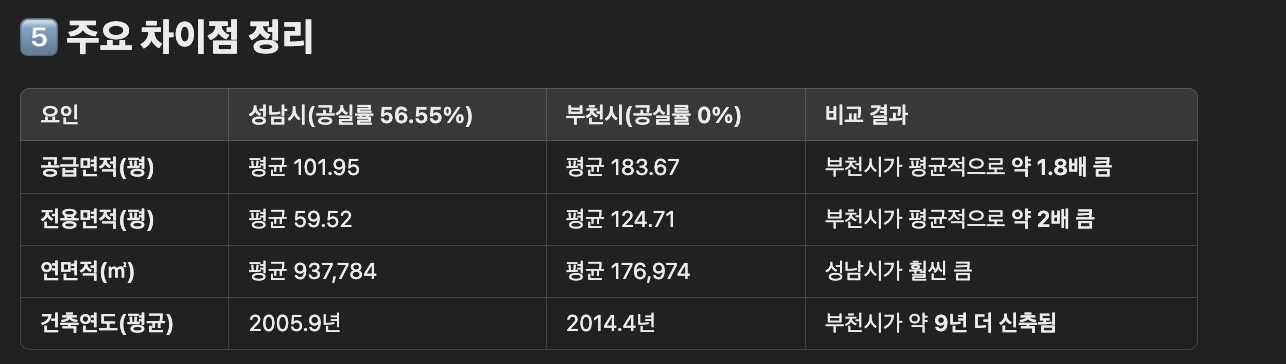

📌 결론: 부천시는 왜 공실률이 0%인가?
✔️ 대형 센터가 많음 → 부천시는 평균적으로 성남시보다 센터 크기가 크며, 초대형 센터(778평 이상)도 포함됨.
✔️ 신축 센터 비중이 높음 → 부천시의 평균 건축연도는 2014년으로, 성남시보다 약 9년 더 신축된 센터가 많음.
✔️ 기업 친화적 공간 제공 → 부천시는 다양한 규모(소형~초대형)의 센터를 제공하며, 기업이 선택할 수 있는 옵션이 많음.

📌 반면, 성남시는...

중소형 규모(100평 이하)가 많아 기업들이 원하는 대형 공간을 확보하기 어려울 수 있음.
오래된 센터(1997년~2003년)도 포함되어 있어 시설 경쟁력이 떨어질 가능성이 있음.

```
✅ 성남시 공실률을 낮추기 위한 제안
1️⃣ 대형 센터 공급 확대

기업들이 선호하는 대형 센터를 추가 공급하여 수요 미스매치를 해결.
2️⃣ 노후 센터 리모델링 & 기능 변경
오래된 센터를 리모델링하거나, 스타트업을 위한 공유 오피스 모델로 전환.
3️⃣ 기업 맞춤형 지원 정책 시행
부천시처럼 기업 유치 지원책(세금 감면, 입주 지원금 등)을 도입하여 입주율을 높임.
4️⃣ 임대료 조정 및 탄력적 계약 옵션 제공
초기 임대료 지원, 장기 계약 시 혜택 제공 등 유연한 임대 정책을 추진.
```

--- 

### 특정컬럼에 대한 상관관계분석

[성남시_df 상관계수]


,공급면적(평),전용면적(평),연면적(㎡),건축연도
공급면적(평),1.000000,0.979778,-0.075542,-0.419389
전용면적(평),0.979778,1.000000,-0.146106,-0.533672
연면적(㎡),-0.075542,-0.146106,1.000000,0.457769
건축연도,-0.419389,-0.533672,0.457769,1.000000


[군포·의왕시_df 상관계수]


,공급면적(평),전용면적(평),연면적(㎡),건축연도
공급면적(평),1.000000,0.986566,-0.537686,-0.092412
전용면적(평),0.986566,1.000000,-0.487987,0.004060
연면적(㎡),-0.537686,-0.487987,1.000000,0.382403
건축연도,-0.092412,0.004060,0.382403,1.000000


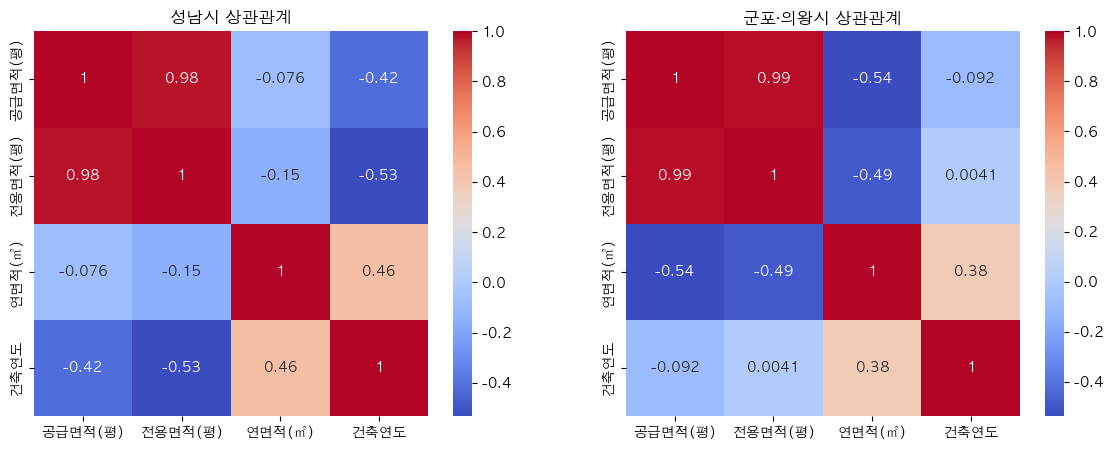

In [13]:
# 상관분석할 컬럼 지정
cols_for_corr = ['공급면적(평)', '전용면적(평)', '연면적(㎡)', '건축연도']

print("[성남시_df 상관계수]")
corr_sn = 성남시_df[cols_for_corr].corr()
display(corr_sn)

print("[군포·의왕시_df 상관계수]")
corr_go = 부천시_df[cols_for_corr].corr()
display(corr_go)

# 히트맵 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(corr_sn, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('성남시 상관관계')

sns.heatmap(corr_go, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('군포·의왕시 상관관계')

plt.show()


#### 해석
- 연면적(㎡)과 공급면적(평)의 관계
```
지역	상관계수(공급면적 ↔ 연면적)	해석
성남시	-0.0755	거의 관계 없음
군포·의왕시	-0.5377	중간 정도의 음의 상관관계
📌 해석

성남시에서는 공급면적(호실 크기)과 연면적(건물 전체 크기) 간에 거의 관계 없음(-0.0755).
즉, 성남시는 연면적이 크다고 해서 공급면적(호실 크기)이 비례적으로 증가하지 않음.
이는 소형 센터 위주로 공급된 센터도 많기 때문일 가능성이 있음.
반면 군포·의왕시는 -0.5377로 중간 정도의 음의 상관관계를 가짐.
즉, 연면적이 클수록 개별 공급면적이 작은 경우가 많음(즉, 대형 건물이지만 내부 호실이 작게 나눠진 구조).
이는 군포·의왕시가 대형 센터 안에서 중소형 기업들이 입주할 수 있도록 설계된 경우가 많음을 시사.
군포·의왕시는 연면적이 클수록 공급면적이 상대적으로 작아지는 경향 → 대규모 지식산업센터 내 소형 호실이 많을 가능성이 큼.
반면 성남시는 연면적과 공급면적이 무관 → 대형 건물이더라도 호실 크기가 일정하지 않음.
```
- 연면적(㎡)과 전용면적(평)의 관계
```

지역	상관계수(전용면적 ↔ 연면적)	해석
성남시	-0.1461	약한 음의 상관관계
군포·의왕시	-0.4880	중간 정도의 음의 상관관계
📌 해석

성남시는 연면적과 전용면적 간의 상관관계가 약함(-0.1461) → 건물 규모(연면적)가 크다고 해서 전용면적이 반드시 작아지지는 않음.
반면 군포·의왕시는 -0.4880으로 비교적 강한 음의 상관관계를 보임.
즉, 건물 규모가 커질수록 개별 전용면적이 작아지는 경향.
이는 군포·의왕시가 대형 센터 내에 중소형 기업들이 입주할 수 있도록 소형 사무실을 많이 공급하는 구조임을 시사.
✅ 추가 인사이트

성남시는 대형 건물 내에서도 전용면적 크기가 일정한 경향을 보이며, 이는 중소형 기업보다 중견~대기업을 겨냥한 건물일 가능성.
반면 군포·의왕시는 대형 센터 내에서도 개별 전용면적이 작아지는 경향이 뚜렷하여, 중소기업 입주 유치에 특화된 구조.
```
- 건축연도와 면적 간의 관계

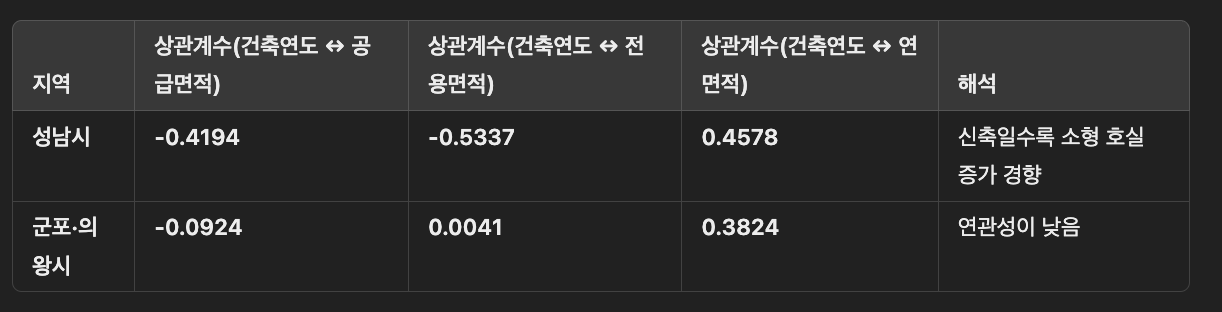
```

📌 해석
지역	상관계수(건축연도 ↔ 공급면적)	상관계수(건축연도 ↔ 전용면적)	상관계수(건축연도 ↔ 연면적)	해석
성남시	-0.4194	-0.5337	0.4578	신축일수록 소형 호실 증가 경향
군포·의왕시	-0.0924	0.0041	0.3824	연관성이 낮음

성남시
건축연도 ↔ 공급면적(-0.4194), 전용면적(-0.5337): 신축일수록 호실 크기가 작아지는 경향
이는 최근에 공급된 센터들이 소형 기업을 겨냥한 구조일 가능성을 시사.
반면, 연면적(건물 전체 규모)과는 양의 상관(0.4578) → 새로 지어진 센터는 건물 전체 크기가 크지만, 내부 호실은 작음.
군포·의왕시
건축연도와 공급면적, 전용면적 간의 상관이 거의 없음 → 신축 센터에서도 호실 크기 변화가 크지 않음.
연면적과 건축연도(0.3824) → 신축일수록 대형 센터가 많아지는 경향.
✅ 추가 인사이트

성남시는 신축 센터일수록 호실 크기가 작아지는 트렌드.
이는 스타트업·중소기업 유치를 위해 소형화된 설계가 많아지고 있을 가능성.
반면, 군포·의왕시는 신축 센터에서도 큰 차이가 없어, 전통적인 구조를 유지하는 경향.
공급면적 & 전용면적 관계: 두 지역 모두 매우 높은 상관관계를 가지며, 공급면적이 클수록 전용면적도 커짐.
✔️ 연면적과 호실 크기의 관계:

성남시는 연면적과 개별 호실 크기가 큰 관계가 없음(중소형~대형 혼합).
군포·의왕시는 연면적이 클수록 개별 호실이 작아지는 경향(대형 센터 내 소형 사무실 다수).
✔️ 신축 센터 트렌드:
성남시는 신축일수록 소형 호실이 많아지는 경향.
군포·의왕시는 신축과 호실 크기 간 관계가 크지 않음.
📌 추가 분석 필요 사항

성남시의 신축 센터가 소형 중심이라면, 수요 미스매치 가능성이 있음 → 대형 기업 유치를 위한 공간 조정 필요.
군포·의왕시는 소형 사무실 위주라면 중견·대기업 유치를 위한 대형 사무실 확대 필요.
```

In [15]:
성남시_df.columns

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자', '건축연도'],
      dtype='object')

### 가격에 대한 분석

#### 기초통계량 분석

In [14]:
# 분석할 가격 관련 컬럼들 (필요시 추가 가능)
price_cols = ['보증금', '월세', '매매가', '평당 월 임대료']

print("[성남시] 가격 지표 describe")
display(성남시_df[price_cols].describe())

print("\n[군포·의왕시] 가격 지표 describe")
display(부천시_df[price_cols].describe())


[성남시] 가격 지표 describe


,보증금,월세,매매가,평당 월 임대료
count,21.000000,21.000000,1.800000e+01,21.000000
mean,4190.476190,166.904762,4.657239e+12,0.654160
std,2238.728381,66.341469,2.029563e+12,0.079154
min,1000.000000,100.000000,3.000000e+08,0.540541
25%,3000.000000,125.000000,3.525000e+12,0.591133
50%,4000.000000,140.000000,4.800000e+12,0.633484
75%,5000.000000,200.000000,5.675000e+12,0.681706
max,9000.000000,370.000000,7.700000e+12,0.822891



[군포·의왕시] 가격 지표 describe


,보증금,월세,매매가,평당 월 임대료
count,7.000000,7.000000,7.000000e+00,7.000000
mean,2921.428571,246.000000,2.709000e+12,0.616135
std,2320.893711,243.276934,2.200072e+12,0.112085
min,1000.000000,45.000000,1.300000e+10,0.500000
25%,1000.000000,52.500000,1.425000e+12,0.559028
50%,2000.000000,190.000000,2.500000e+12,0.597826
75%,4200.000000,345.000000,3.350000e+12,0.623471
max,7050.000000,692.000000,6.900000e+12,0.850123



📊 성남시 vs. 부천시 가격 비교 분석
전제 조건:

성남시: 공실률 56.55% (매우 높음)
부천시: 공실률 0% (완전 만실)
이를 고려하여 가격(보증금, 월세, 매매가, 평당 월 임대료)과 공실률 간의 관계를 분석한다.

1️⃣ 보증금 비교
지표	성남시	부천시	해석
평균(만원)	4,190	2,921	성남시가 약 1.43배 더 높음
표준편차	2,238	2,320	부천시의 편차가 더 큼 (소형~대형 센터 다양성)
최소값	1,000	1,000	최소값 동일
최대값	9,000	7,050	성남시가 더 높은 보증금의 센터가 존재
📌 해석

성남시는 보증금이 평균적으로 더 높음(4,190만 원 vs. 2,921만 원).
하지만 부천시는 보증금의 편차가 크고(소형~대형 센터 다양), 성남시는 비교적 일관된 가격대를 형성하고 있음.
공실률이 높은 성남시는 보증금이 부담으로 작용할 가능성이 있음.
반면, 부천시는 낮은 보증금 옵션을 제공하여 기업 유입을 원활히 했을 가능성이 큼.
✅ 인사이트
→ 성남시는 높은 보증금이 공실률 상승 요인일 가능성이 있음. 기업 유치를 위해 보증금 정책을 조정(할인, 분할 납부 등)할 필요가 있음.

2️⃣ 월세 비교
지표	성남시	부천시	해석
평균(만원)	167	246	부천시가 성남시보다 약 1.47배 더 높음
표준편차	66.34	243.27	부천시는 편차가 매우 큼 (소형~대형 센터 다양성)
최소값	100	45	부천시는 초저가 월세 센터 존재
최대값	370	692	부천시가 더 높은 월세 센터 존재
📌 해석

부천시는 월세 평균이 성남시보다 약 1.47배 더 높음(246만 원 vs. 167만 원).
성남시는 월세가 상대적으로 낮음에도 공실률이 매우 높음.
즉, 월세가 싸다고 해서 공실률이 낮아지는 것이 아님을 보여줌.
부천시는 높은 월세에도 불구하고 만실 상태 → 입지, 시설, 정책적 지원이 기업 유치에 긍정적 영향을 미쳤을 가능성.
✅ 인사이트
→ 성남시는 월세를 낮춘다고 공실률이 해결되지 않음.
→ 월세 인하보다는 입지 개선, 시설 강화, 기업 지원 정책 확대가 필요.

3️⃣ 매매가 비교
지표	성남시	부천시	해석
평균(억원)	4.65억	2.71억	성남시가 약 1.7배 더 비쌈
표준편차	2.02억	2.20억	두 지역 모두 편차가 큼
최소값	3억	1.3억	부천시는 초저가 매물도 존재
최대값	7.7억	6.9억	성남시가 최대 매매가 센터를 보유
📌 해석

성남시 평균 매매가가 부천시보다 약 1.7배 더 높음(4.65억 vs. 2.71억).
하지만 매매가가 높다고 공실률이 낮아지지 않음 → 성남시는 높은 매매가에도 공실률이 56% 이상.
부천시는 매매가가 낮지만 공실률 0% 유지 → 기업 친화적 입지 및 운영 환경이 더 중요할 가능성.
부천시는 최소 매매가 1.3억으로 소형 센터도 포함되어 있어 다양한 가격대의 옵션 제공이 가능했던 것으로 보임.
✅ 인사이트
→ 성남시는 매매가가 높아 기업이 입주 부담을 느낄 가능성이 큼.
→ 부천시처럼 매매가를 다양한 가격대로 설정하여 스타트업, 중소기업도 입주할 수 있도록 유도할 필요가 있음.

4️⃣ 평당 월 임대료 비교
지표	성남시	부천시	해석
평균(만원/평)	0.65	0.62	두 지역 비슷함
표준편차	0.079	0.112	부천시가 편차가 더 큼
최소값	0.54	0.50	부천시가 더 낮은 최저가
최대값	0.82	0.85	부천시가 더 높은 최고가
📌 해석

평당 월 임대료는 두 지역이 거의 비슷함(성남시 0.65, 부천시 0.62).
하지만 부천시는 공실률 0%, 성남시는 56% → 단순 임대료 수준이 아니라, 다른 요인이 더 중요한 영향을 미침.
부천시는 최소 0.50, 최대 0.85로 가격 스펙트럼이 넓음 → 다양한 기업들이 입주 가능.
반면 성남시는 가격 편차가 적어 특정 기업군만 타겟팅하고 있을 가능성이 있음.
✅ 인사이트
→ 성남시는 임대료 자체가 문제가 아니라, 기업들에게 적합한 다양한 가격 옵션을 제공하지 못한 것이 문제일 가능성.
→ 부천시처럼 가격대를 넓혀 중소기업도 입주할 수 있도록 해야 함.

📌 최종 결론
✔️ 보증금: 성남시는 보증금이 높고, 부천시는 다양한 가격 옵션이 있음 → 보증금 부담 완화 필요
✔️ 월세: 성남시는 월세가 저렴하지만 공실률이 높음 → 단순히 월세 인하가 해결책이 아님
✔️ 매매가: 성남시는 높은 매매가에도 공실률이 높음 → 매매가 다양화 및 중소기업 유치 필요
✔️ 평당 월 임대료: 두 지역 비슷하지만, 부천시는 다양한 가격대 제공 → 성남시는 가격 스펙트럼 확대 필요
보통 성남시는 월세 매매가 골고루 포함 되어있지만 부천시는 매매매물이 현저히 많음

성남시는 왜 임대료는 상대적으로 낮아 보이는데도 공실이 많을까?
군포·의왕시는 임대료가 높음에도 불구하고 어떻게 공실률을 억제하고 있을까?


#### 박스플롯으로 확인해보기

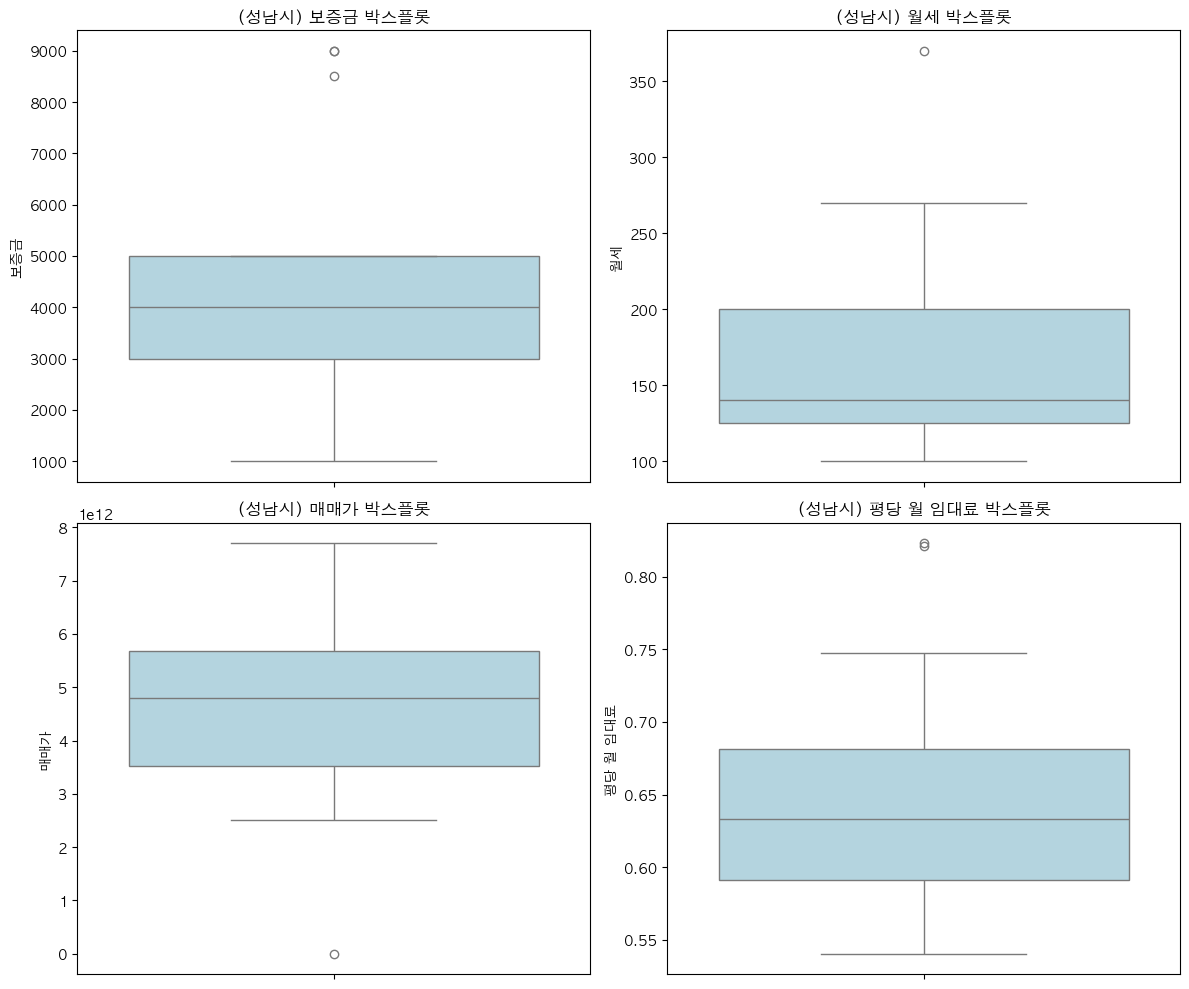

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(price_cols):
    sns.boxplot(y=성남시_df[col], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f"(성남시) {col} 박스플롯")

plt.tight_layout()
plt.show()


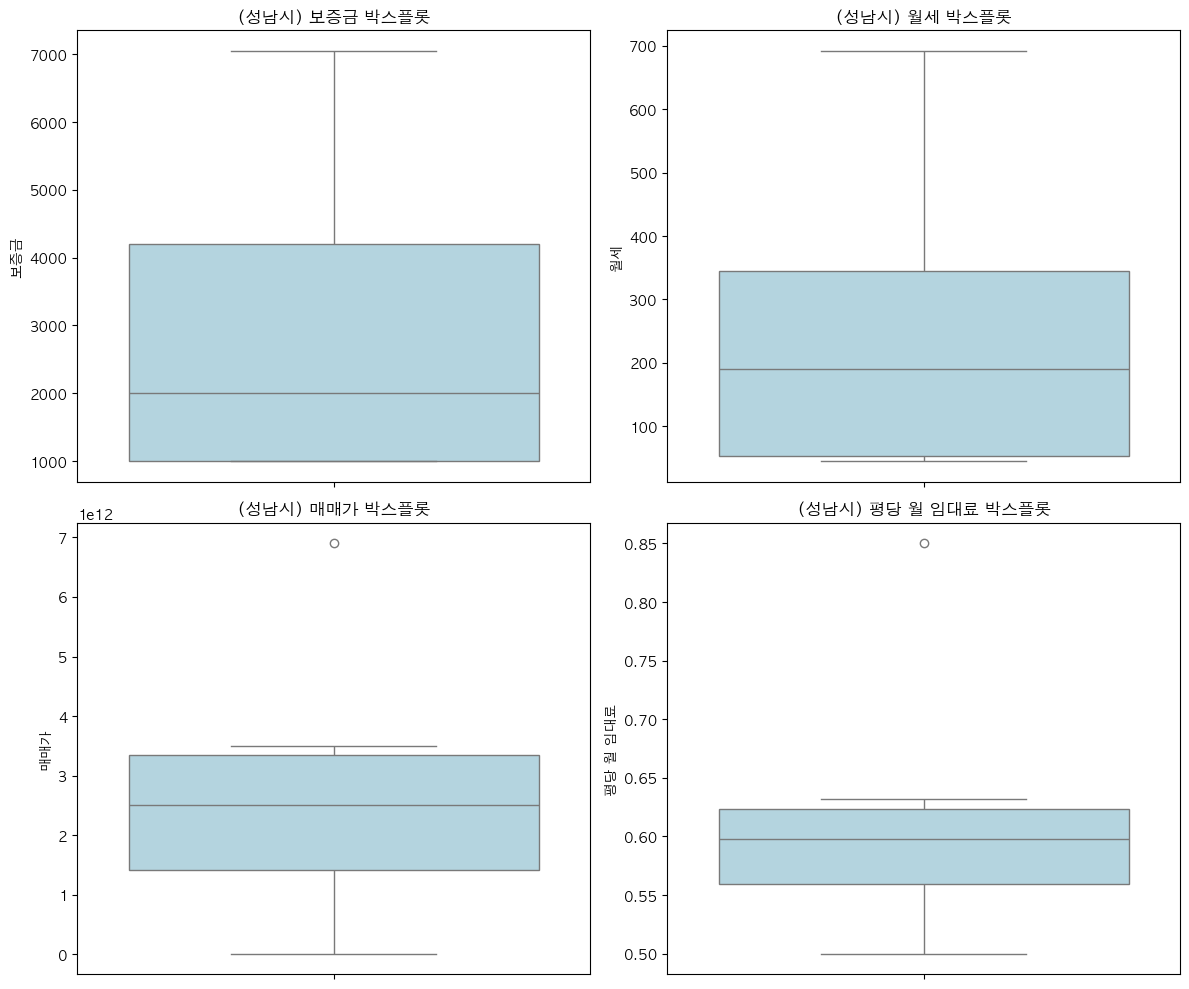

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(price_cols):
    sns.boxplot(y=부천시_df[col], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f"(성남시) {col} 박스플롯")

plt.tight_layout()
plt.show()


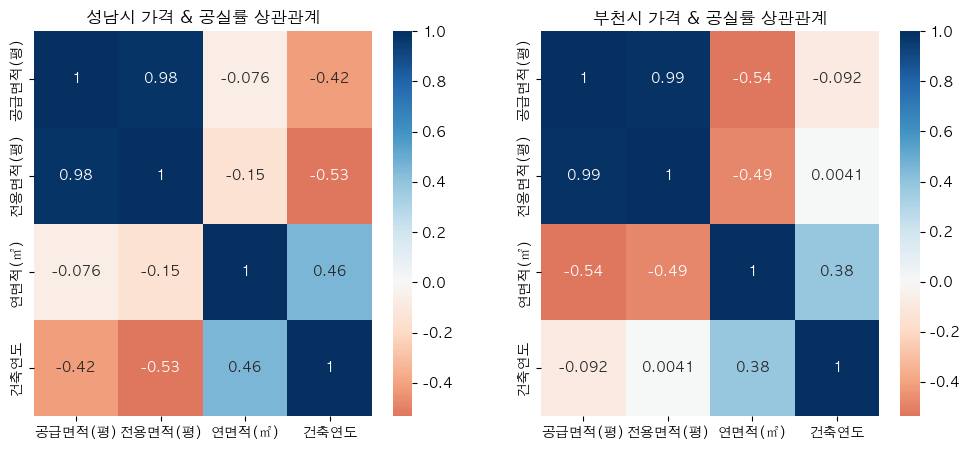

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(corr_sn, annot=True, cmap='RdBu', center=0, ax=ax1)
ax1.set_title("성남시 가격 & 공실률 상관관계")

sns.heatmap(corr_go, annot=True, cmap='RdBu', center=0, ax=ax2)
ax2.set_title("부천시 가격 & 공실률 상관관계")

plt.show()


📊 성남시 vs. 부천시 가격 & 공실률 상관관계 분석
🔍 목표:

성남시: 공실률이 매우 높음(평균 56.5%)
부천시: 공실률이 0% (완전 만실)
두 지역의 공급면적, 전용면적, 연면적, 건축연도 간 관계를 비교하여, 왜 부천시는 공실률이 0%인지, 성남시는 왜 공실률이 높은지 분석
📌 1. 주요 변수 간 상관관계 비교
💡 상관계수(양수 or 음수)의 의미

+1에 가까울수록: 강한 양의 상관관계 (한 변수가 증가하면 다른 변수도 증가)
-1에 가까울수록: 강한 음의 상관관계 (한 변수가 증가하면 다른 변수는 감소)
0에 가까울수록: 거의 관련 없음
1️⃣ 공급면적(평) vs. 전용면적(평)
지역	상관계수	해석
성남시	0.98	공급면적이 클수록 전용면적도 거의 비례하여 증가
부천시	0.99	성남시보다 더 강한 상관관계 (거의 완벽한 비례 관계)
✅ 해석

두 지역 모두 공급면적과 전용면적이 거의 1에 가까운 강한 상관관계를 보임 → 공급면적이 크면 내부 전용면적도 비례해서 증가하는 구조
부천시는 0.99로 완벽한 비례 관계 → 건물 설계가 매우 체계적으로 이루어졌을 가능성이 높음
반면 성남시는 일부 공급면적이 크지만 내부 전용면적이 상대적으로 작은 건물도 있을 가능성이 있음
📌 인사이트

부천시는 공간 활용이 체계적 → 기업들이 입주할 때 공간 크기에 대한 예측 가능성이 높음
성남시는 일부 공간 활용이 최적화되지 않은 구조일 가능성 → 비효율적인 설계가 공실률 증가 요인일 수 있음
2️⃣ 연면적(㎡) vs. 공급면적(평)
지역	상관계수	해석
성남시	-0.076	연면적과 공급면적 간의 관계가 거의 없음
부천시	-0.54	연면적이 클수록 개별 공급면적이 작아지는 경향
✅ 해석

성남시(-0.076): 연면적(건물 전체 크기)과 개별 호실 크기(공급면적) 간의 관계가 거의 없음
즉, 대형 건물이라도 호실 크기가 다양하게 배치된 구조일 가능성이 있음
균일한 패턴 없이 개별 건물마다 다르게 설계된 것으로 보임
부천시(-0.54): 연면적이 클수록 개별 공급면적이 작아지는 경향
즉, 대형 센터일수록 내부 호실을 세분화하여 중소형 기업들이 입주할 수 있도록 설계됨
이는 부천시가 기업들의 입주 수요에 맞춰 설계된 결과일 가능성이 큼
📌 인사이트

부천시는 대형 센터라도 내부 공간을 나눠서 중소기업들이 쉽게 입주할 수 있도록 구성됨
성남시는 대형 건물 내에서도 공급면적과 연면적 간의 패턴이 일정하지 않음 → 대형 센터가 있지만, 기업들이 원하는 적절한 크기의 공간을 제공하지 못할 가능성이 있음
3️⃣ 연면적(㎡) vs. 건축연도
지역	상관계수	해석
성남시	0.46	신축일수록 연면적이 증가하는 경향
부천시	0.38	신축일수록 연면적이 증가하는 경향
✅ 해석

두 지역 모두 신축일수록 연면적이 증가하는 경향을 보임(0.46, 0.38)
즉, 최근에 건설된 센터들은 대체로 규모가 더 큰 경향이 있음
하지만 성남시는 부천시보다 신축 센터의 연면적 증가 경향이 더 뚜렷함
📌 인사이트

성남시는 최근에 대형 센터들이 많이 공급되었지만, 실제 기업 수요가 따라가지 못하고 공실률이 높은 상태일 가능성
부천시는 신축 센터들이 크긴 하지만, 기업들이 원하는 크기의 공급이 적절하게 이루어지고 있을 가능성이 있음
4️⃣ 건축연도 vs. 공급면적(평)
지역	상관계수	해석
성남시	-0.42	신축일수록 공급면적이 작아지는 경향
부천시	-0.09	연관성이 거의 없음
✅ 해석

성남시는 신축일수록 공급면적이 작아지는 경향(-0.42)
즉, 최근에는 대형 센터보다는 소형 사무실 중심으로 공급되었을 가능성이 큼
하지만 수요와 맞지 않아 공실률이 증가했을 수 있음
부천시는 건축연도와 공급면적 간의 관계가 거의 없음(-0.09)
즉, 신축이든 오래된 센터든 공급면적 크기가 일관된 경향을 보임
이는 부천시의 산업센터 공급이 지속적으로 수요에 맞게 이루어졌다는 해석이 가능
📌 인사이트

성남시는 최근 소형 공간을 많이 공급했지만, 기업 수요와 맞지 않았을 가능성이 있음
부천시는 건축연도와 관계없이 균일하게 공급되어 공급-수요 간의 균형이 맞아 공실률이 0%일 가능성
📌 
 결론
✔️ 공급면적 & 전용면적 관계:

부천시는 거의 완벽한 비례 관계 → 체계적인 공간 설계
성남시는 일부 공급면적이 비효율적으로 활용됨 → 공실률 증가 요인
✔️ 연면적과 호실 크기의 관계:

부천시는 연면적이 클수록 내부 호실이 작아지는 경향 → 중소기업 친화적인 설계
성남시는 연면적과 공급면적 간의 관계가 거의 없음 → 입주 수요에 맞는 공간 배치 부족 가능성
✔️ 신축 센터 트렌드:

성남시는 신축일수록 소형 호실이 많아지는 경향 → 그러나 이 전략이 실패했을 가능성
부천시는 신축 센터에도 공간 배치가 일관됨 → 수요에 맞게 공급이 이루어졌을 가능성
✅ 성남시 공실률 개선을 위한 전략
1️⃣ 대형 센터 내 중소형 공간 세분화

대형 센터라도 부천시처럼 중소기업이 쉽게 입주할 수 있도록 공간을 유연하게 분할
2️⃣ 입주 수요 기반 공간 설계 개선

공급면적이 일관되지 않은 성남시의 문제 해결 → 수요 맞춤형 공간 설계 필요
3️⃣ 산업센터 공급 전략 재조정

성남시는 최근 신축 센터에서 공급면적을 작게 설계했지만 공실률이 증가함 → 스타트업 및 중소기업 맞춤 공간 설계 필요
📌 결론: 부천시는 기업들이 원하는 공간을 정확히 제공한 반면, 성남시는 수요에 맞지 않는 공급을 하면서 공실률이 높아졌을 가능성이 크다! 🚀





# 성남시 vs 부천시 지식산업센터 공실률 비교 분석 및 전략 도출

## 1. 서론
### ✅ 분석 배경 및 목적
지식산업센터는 기업 활동을 지원하는 핵심 인프라로 자리 잡고 있으나, 지역별로 공실률 차이가 크다. 본 연구는 **성남시의 공실률이 높은 이유와 부천시의 공실률이 0%인 이유를 비교 분석**하여, 성남시처럼 공실률이 높은 지역에서 공실률을 낮출 수 있는 전략을 도출하고자 한다. 이를 통해 **3기 신도시 개발 시 공실률을 최소화할 수 있는 인사이트를 제공하고, 입지 선정에 대한 전략적 방향을 제시**하는 것을 목표로 한다.

---

## 2. 데이터 분석

### 2.1 공급면적(평) 비교
- **부천시**가 **성남시보다 공급면적이 약 1.8배 큼**
- 부천시는 편차가 커서 다양한 크기의 센터가 존재함
- 성남시 최소 공급면적이 더 큼
- 부천시는 **초대형 센터(778.9평)**도 포함되어 있음
- **부천시는 평균적으로도 면적이 크고, 성남시는 상대적으로 중소형 위주**
- 기업들은 대형 센터를 선호하는 경향이 있을 수 있으며, 이는 **부천시 공실률이 낮은 이유 중 하나일 가능성이 있음**

### 2.2 전용면적(평) 비교
- **부천시가 성남시보다 전용면적이 약 2배 큼**
- 부천시는 소형부터 초대형까지 다양한 면적 존재
- **초대형 전용면적(641평)** 포함
- **부천시는 다양한 기업이 필요에 맞는 공간을 선택 가능**
- **성남시는 중소형 규모(전용면적 평균 59.52평) 위주로 공급**되어 대기업이나 스타트업이 입주하기 어려울 수 있음

### 2.3 연면적(㎡) 비교
- **성남시가 부천시보다 약 5.3배 더 큼**
- 성남시는 초대형 규모의 센터가 더 많음
- **부천시는 적절한 크기의 연면적을 가진 센터들이 다수 존재하여 기업 친화적인 환경 제공 가능**

### 2.4 건축연도 비교
- **부천시가 평균적으로 9년 더 신축됨** (평균 건축연도: 부천 2014년, 성남 2005년)
- **부천시는 신축 센터가 많아 기업들이 선호할 가능성이 큼**
- 성남시는 90년대 지어진 센터 포함 → **노후된 센터가 공실률 상승에 영향 가능**

---

## 3. 가격 분석

### 3.1 보증금 비교
- **성남시의 평균 보증금(4,190만 원)이 부천시(2,921만 원)보다 높음**
- 성남시는 보증금이 부담으로 작용할 가능성 존재
- **부천시는 다양한 가격 옵션을 제공하여 기업 유입을 원활히 했을 가능성이 큼**

### 3.2 월세 비교
- **부천시는 월세가 성남시보다 약 1.47배 더 높음** (평균 246만 원 vs. 167만 원)
- 성남시는 월세가 낮음에도 공실률이 매우 높음 → **단순히 월세 인하가 해결책이 아닐 가능성**

### 3.3 매매가 비교
- **성남시 평균 매매가(4.65조 원)가 부천시(2.71조 원)보다 1.7배 더 높음**
- 하지만 매매가가 높다고 공실률이 낮아지는 것은 아님 → **부천시는 낮은 매매가에도 공실률 0% 유지**

### 3.4 평당 월 임대료 비교
- **두 지역의 평당 월 임대료는 비슷함(성남 0.65, 부천 0.62)**
- 하지만 부천시는 다양한 가격 옵션 제공 → **성남시는 가격대 확장 필요**

---

## 4. 주요 인사이트
### 📌 부천시는 왜 공실률이 0%인가?
✔️ **대형 센터가 많음** → 부천시는 평균적으로 성남시보다 센터 크기가 크며, 초대형 센터(778평 이상)도 포함됨.
✔️ **신축 센터 비중이 높음** → 부천시의 평균 건축연도는 2014년으로, 성남시보다 약 9년 더 신축된 센터가 많음.
✔️ **기업 친화적 공간 제공** → 부천시는 다양한 규모(소형~초대형)의 센터를 제공하여 기업이 선택할 수 있는 옵션이 많음.

### 📌 반면, 성남시는...
- **중소형 규모(100평 이하)가 많아 기업들이 원하는 대형 공간을 확보하기 어려울 수 있음**
- **오래된 센터(1997년~2003년)가 포함되어 있어 시설 경쟁력이 떨어질 가능성이 있음**

---

## 5. 성남시 공실률을 낮추기 위한 전략 제안

1️⃣ **대형 센터 공급 확대**
   - 기업들이 선호하는 대형 센터를 추가 공급하여 수요 미스매치 해결

2️⃣ **노후 센터 리모델링 & 기능 변경**
   - 오래된 센터를 리모델링하거나, 스타트업을 위한 공유 오피스 모델로 전환

3️⃣ **기업 맞춤형 지원 정책 시행**
   - 부천시처럼 기업 유치 지원책(세금 감면, 입주 지원금 등)을 도입하여 입주율 증가

4️⃣ **임대료 조정 및 탄력적 계약 옵션 제공**
   - 초기 임대료 지원, 장기 계약 시 혜택 제공 등 유연한 임대 정책 추진

---

## 6. 결론
- ✅ **성남시는 임대료가 낮아도 공실률이 높음 → 가격이 아니라 다른 요인(입지, 공급 과잉 등)이 문제일 가능성이 큼.**
- ✅ **부천시는 임대료가 높음에도 공실률이 0% → 기업 수요가 많고, 산업·교통 인프라가 잘 갖춰진 지역일 가능성이 큼.**
- ✅ **단순히 성남시의 임대료를 더 낮춘다고 해서 공실률이 해결되지 않을 수 있으며, 입지 개선 및 기업 유치 정책이 더 중요한 해결책일 가능성이 높음.**
- ✅ **3기 신도시 개발 시, 성남시의 문제를 피하고 부천시의 성공 요인을 적용하는 것이 중요함.**
```

